In [317]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import PowerTransformer,LabelEncoder,StandardScaler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor

import pickle
import warnings
warnings.filterwarnings('ignore')

In [290]:
abalone = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Name / Data Type / Measurement Unit / Description
------------------------------------------------------------
- Sex / nominal / -- / M, F, and I (infant)
- Length / continuous / mm / Longest shell measurement
- Diameter / continuous / mm / perpendicular to length
- Height / continuous / mm / with meat in shell
- Whole weight / continuous / grams / whole abalone
- Shucked weight / continuous / grams / weight of meat
- Viscera weight / continuous / grams / gut weight (after bleeding)
- Shell weight / continuous / grams / after being dried
- Rings / integer / -- / +1.5 gives the age in years.

In [291]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Dataset Information:
- Range Index = 0 - 4176
- Columns = 9
- No null Values
- Dtypes = float(7),int(1),object(1)

In [292]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [293]:
abalone.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No null values

In [294]:
abalone.shape

(4177, 9)

Shape of the Dataset.

In [295]:
abalone['Sex'] = LabelEncoder().fit_transform(abalone['Sex'])
abalone['Sex'].value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

Converting the object dtypes to int dtype.
- Using LabelEncoder to encode the Sex columns
- 0 = Female
- 1 = I
- 2 = Male

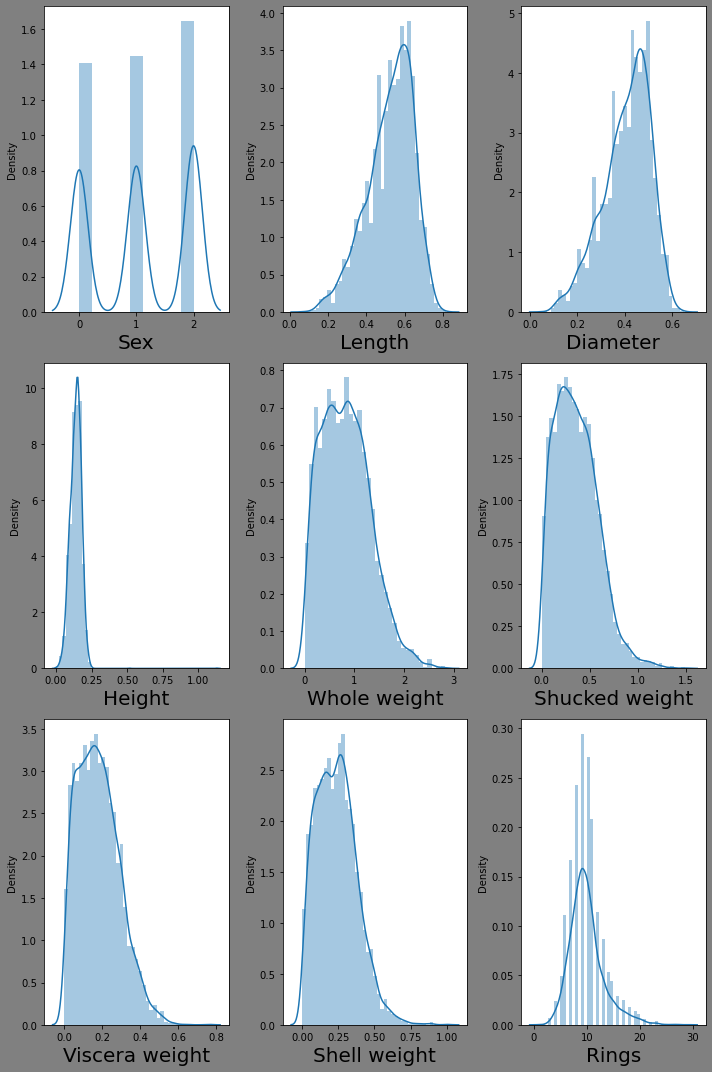

In [296]:
plt.figure(figsize = (10,15),facecolor='grey')
plotnumber = 1

for column in abalone:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(abalone[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Visualization of dataset using distplot to see the normal distribution of data and found that the dataset is close to normal distribution and also there are some skewness and outliers present in the dataset.

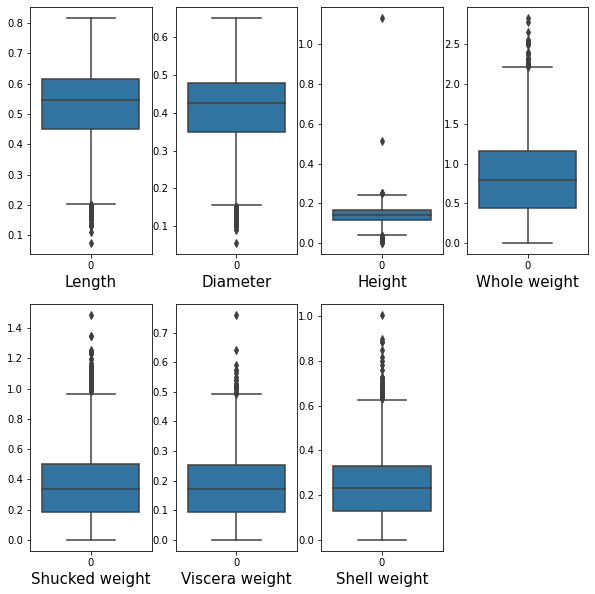

In [297]:
plt.figure(figsize = (10,10))
graph = 1
for column in abalone.drop(['Sex','Rings'],axis = 1):
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = abalone[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Using box plot to see the outliers present in dataset.

In [298]:
out = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']
scale = PowerTransformer()
abalone[out] = scale.fit_transform(abalone[out].values)
abalone[out]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809
1,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420
2,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262
3,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931
4,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528
...,...,...,...,...,...,...,...
4172,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008
4173,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215
4174,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398
4175,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145


By Power Transformer method = 'Yeo-Johnson', tried to remove the outlier present in the dataset.

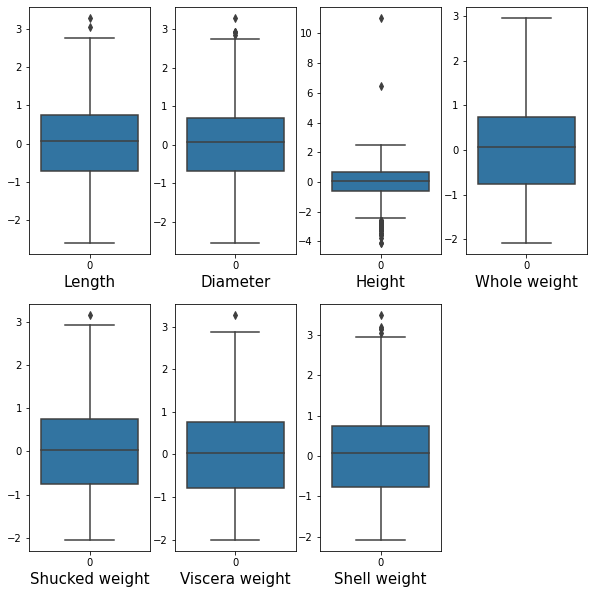

In [299]:
plt.figure(figsize = (10,10))
graph = 1
for column in abalone.drop(['Sex','Rings'],axis = 1):
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = abalone[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Checking again the outliers, using boxplot, and resulting that many outliers are removed from the dataset but some outliers are still present.

In [300]:
#1 Quantile
q1 = abalone.quantile(0.25)
#3 Quantile
q3 = abalone.quantile(0.75)
#IQR
iqr = q3 - q1

By Quantiles, tried to remove the remaining outliers.

In [301]:
len_high = (q3.Length + (1.5 * iqr.Length))
print(len_high)

index_len = np.where(abalone['Length'] > len_high)
print(index_len)

abalone = abalone.drop(abalone.index[index_len])
print(abalone.shape)

abalone.reset_index()

2.954433362093514
(array([1428, 2334]),)
(4175, 9)


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4170,4172,0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4171,4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4172,4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4173,4175,0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


Removed Outlier of Length column.

In [302]:
dia_high = (q3.Diameter + (1.5 * iqr.Diameter))
print(dia_high)

index_dia = np.where(abalone['Diameter'] > dia_high)
print(index_dia)

abalone = abalone.drop(abalone.index[index_dia])
print(abalone.shape)

abalone.reset_index()

2.802261743156312
(array([1207, 1209, 1762]),)
(4172, 9)


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4167,4172,0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4168,4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4169,4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4170,4175,0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


Removed Outlier of Diameter column.

In [303]:
hei_high = (q3.Height + (1.5 * iqr.Height))
print(hei_high)

index_hei = np.where(abalone['Height'] > hei_high)
print(index_hei)

abalone = abalone.drop(abalone.index[index_hei])
print(abalone.shape)

abalone.reset_index()

2.5380472076523235
(array([1415, 2047]),)
(4170, 9)


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4165,4172,0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4166,4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4167,4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4168,4175,0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


In [304]:
hei_low = (q1.Height - (1.5 * iqr.Height))
print(hei_low)

index_hei_low = np.where(abalone['Height'] < hei_low)
print(index_hei_low)

abalone = abalone.drop(abalone.index[index_hei_low])
print(abalone.shape)

abalone.reset_index()

-2.453765796211721
(array([  42,  174,  178,  236,  237,  238,  239,  306,  321,  333,  525,
        526,  547,  694,  718,  719,  720, 1053, 1054, 1055, 1056, 1174,
       1255, 1425, 1527, 1819, 1981, 1982, 2108, 2109, 2163, 2165, 2166,
       2373, 2374, 2704, 2705, 3136, 3183, 3311, 3373, 3593, 3794, 3830,
       3892, 3895, 3987, 3989]),)
(4122, 9)


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4117,4172,0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4118,4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4119,4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4120,4175,0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


Removed Outlier of Height column.

In [305]:
q1 = abalone['Shell weight'].quantile(0.25)
#3 Quantile
q3 = abalone['Shell weight'].quantile(0.75)
#IQR
iqr = q3 - q1

In [306]:
shw_high = (q3 + (1.5 * iqr))
print(shw_high)

index_shw = np.where(abalone['Shell weight'] > shw_high)
print(index_shw)

abalone = abalone.drop(abalone.index[index_shw])
print(abalone.shape)

abalone.reset_index()

2.94757463690735
(array([ 162,  165,  874, 2074, 2125]),)
(4117, 9)


,index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,15
1,1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,7
2,2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,9
3,3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,10
4,4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,7
...,...,...,...,...,...,...,...,...,...,...
4112,4172,0,0.249836,0.345636,0.666117,0.241948,0.194158,0.639623,0.193008,11
4113,4173,2,0.492813,0.230611,-0.064823,0.395706,0.495450,0.433568,0.275215,10
4114,4174,2,0.593366,0.645191,1.565082,0.777944,0.838137,1.015607,0.598398,9
4115,4175,0,0.853375,0.769928,0.307083,0.633874,0.858739,0.815184,0.519145,10


Removed Outlier of Shell weight column.

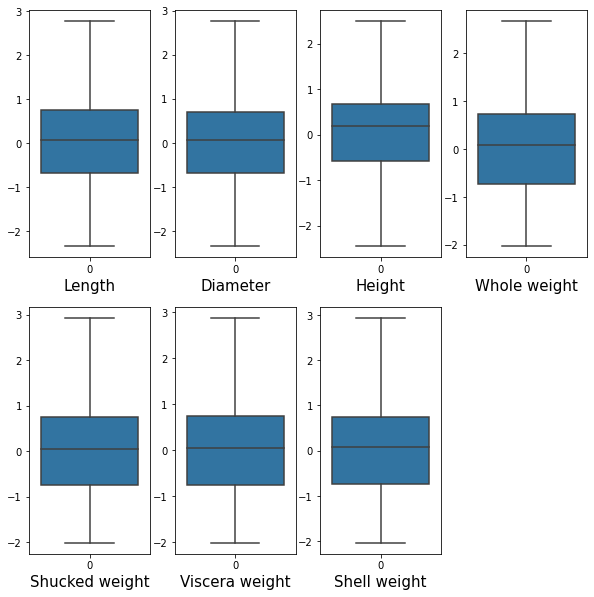

In [307]:
plt.figure(figsize = (10,10))
graph = 1
for column in abalone.drop(['Sex','Rings'],axis = 1):
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = abalone[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

Checking the outlier again, and there are no outliers present in the dataset.

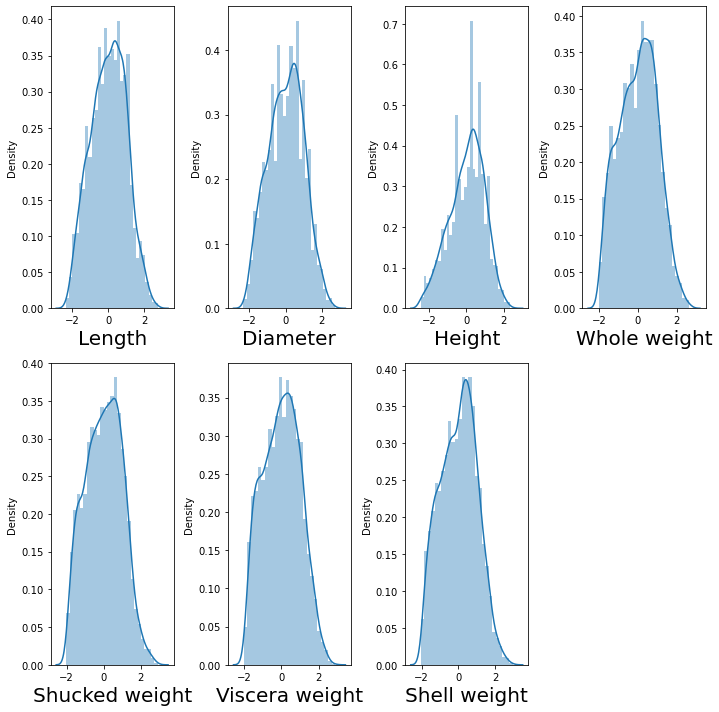

In [308]:
plt.figure(figsize = (10,10))
plotnumber = 1

for column in abalone.drop(['Sex','Rings'],axis = 1):
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(abalone[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Also checking the normal distribution of the dataset, and now its normally distributed and good to go.

In [309]:
abalone["Age"] = abalone["Rings"] + 1.5
abalone.drop("Rings", axis=1, inplace=True)

As per requirment adding up 1.5 in Ring column and making a new column named age, and dropping the Ring column.

In [310]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,-0.685502,-0.549860,-1.124512,-0.576766,-0.540989,-0.693283,-0.587809,16.5
1,2,-1.396344,-1.387333,-1.264396,-1.351761,-1.311662,-1.332953,-1.332420,8.5
2,0,-0.070774,0.008537,-0.064823,-0.198099,-0.366116,-0.255135,-0.098262,10.5
3,2,-0.797286,-0.549860,-0.320227,-0.571893,-0.591672,-0.547782,-0.544931,11.5
4,1,-1.513796,-1.459659,-1.549424,-1.413146,-1.380201,-1.451759,-1.485528,8.5


Checking the dataset. And everything is fine, and also by using Power Transformer our dataset is also scaled and we dont need to scale our dataset again using Standard Scaler.

In [311]:
x = abalone.drop('Age',axis = 1)
y = abalone.Age

Seperating the Features and target.

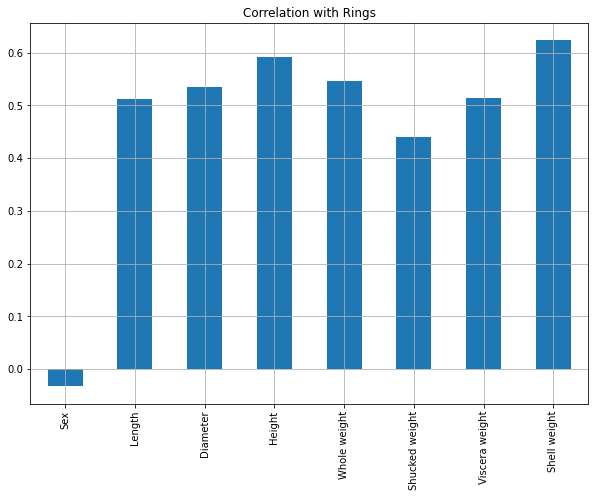

In [312]:
x.corrwith(y).plot(kind = 'bar',grid = True, figsize = (10,7), title = 'Correlation with Rings')
plt.show()

Checking the correlation with respect to target.

In [217]:
best_feature = SelectKBest(score_func = f_classif, k =8)
fit = best_feature.fit(x,y)

In [218]:
brt_score = pd.DataFrame(fit.scores_)
brt_column = pd.DataFrame(x.columns)

In [219]:
feature_score = pd.concat([brt_column,brt_score], axis = 1)
feature_score.columns = ['Feature Name','Scores']
feature_score.nlargest(11,'Scores')

,Feature Name,Scores
7,Shell weight,179.574635
3,Height,151.722824
2,Diameter,142.118129
4,Whole weight,139.606209
1,Length,134.289427
6,Viscera weight,132.435246
5,Shucked weight,104.827727
0,Sex,0.907198


Features correlation score with respect to target.

## Training the Model

**- Train Test Split**

In [220]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.20, random_state = 9)

**- Creating The function for the training and testing score, so that, we can get the results just nby calling the function**

In [221]:
def score(reg, x_train, x_test, y_train, y_test, train = True):
    if train:
        y_pred = reg.predict(x_train)
        print('\n ----- Train Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_train,y_pred))
    
    elif train == False:
        pred = reg.predict(x_test)
        print('\n ----- Test Result ----- \n')
        print('R2 Score:', metrics.r2_score(y_test,pred))

**-- Model Instantiating**

In [222]:
svr = SVR()
knn = KNeighborsRegressor()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()

**- Model Trainning For SVM (SVR)**

In [223]:
svr.fit(x_train,y_train)
score(svr, x_train,x_test,y_train,y_test,train = True)
score(svr, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.5316591735788758

 ----- Test Result ----- 

R2 Score: 0.5350440048213861


**- Model Trainning For KNeighborsRegressor**

In [224]:
knn.fit(x_train,y_train)
score(knn, x_train,x_test,y_train,y_test,train = True)
score(knn, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.6437603443414845

 ----- Test Result ----- 

R2 Score: 0.4811691060211407


**- Model Trainning For AdaBoostRegressor**

In [225]:
ada.fit(x_train,y_train)
score(ada, x_train,x_test,y_train,y_test,train = True)
score(ada, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.24824074050191192

 ----- Test Result ----- 

R2 Score: 0.192837477005931


**- Model Training for RandomForestRegressor**

In [226]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.9321466385579761

 ----- Test Result ----- 

R2 Score: 0.5306186519695439


And as the result the RandomForestRegressor is giving the best score.

In [229]:
pred = rf.predict(x_test)

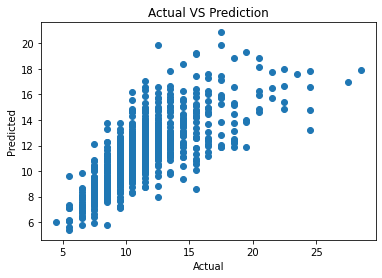

In [230]:
plt.scatter(y_test, pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual VS Prediction")
plt.show()

Plotting Scatterplot for the actual and prediction.

**- Hyperparameter Tunning**

In [314]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'max_samples': 5,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 40,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [315]:
param = {"n_estimators":[20, 100, 200],
           "max_depth":[None, 1, 2, 5],
           "max_features":[0.5, 1, "auto", "sqrt"],
           "min_samples_split":[ 2, 5, 10],
           "min_samples_leaf":[1, 2, 3, 5]}

In [319]:
grid = GridSearchCV(rf, param_grid = param)
grid.fit(x_train,y_train)
print('Best Params = ',grid.best_params_)

Best Params =  {'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [320]:
rf = RandomForestRegressor(max_depth = 5, max_features = 0.5, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)

In [321]:
rf.fit(x_train,y_train)
score(rf, x_train,x_test,y_train,y_test,train = True)
score(rf, x_train,x_test,y_train,y_test,train = False)


 ----- Train Result ----- 

R2 Score: 0.5595519637903785

 ----- Test Result ----- 

R2 Score: 0.49652874497385513


Resulting post tuning is Not giving the better results.

**- Saving the Model using pickle**

In [245]:
filename = 'abalone.ipynb'
pickle.dump(rf, open(filename, 'wb'))